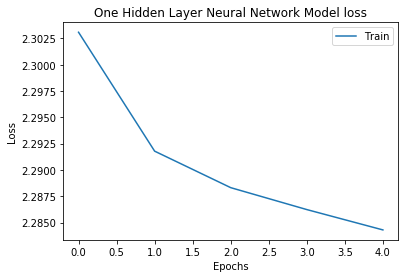

Accuracy score on test set: 0.1
One Hidden Layer Neural Network Confusion matrix
[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]] 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.00      0.00      0.00      1000
          4       0.10      1.00      0.18      1000
          5       0.00      0.00      0.00      1000
          6   

/Users/lle/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.5080 - accuracy: 0.8209
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3769 - accuracy: 0.8625
Epoch 3/10
22208/60000 [==========>...................] - ETA: 3s - loss: 0.3369 - accuracy: 0.8789 ETA: 3s - loss: 0.3387 - accuracy

KeyboardInterrupt: 

In [5]:
# Lan Le - UB Person Number: 50322056
# CSE574 Project 2: Neural Network and Convolutional Neural Network



import os
import util_mnist_reader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical


# Read Fashion MNIST dataset
base_dir = os.path.dirname('__file__')
fashion_file_path = os.path.join(base_dir, 'data/fashion')

X_train, y_train = util_mnist_reader.load_mnist(fashion_file_path, kind='train')
X_test, y_test = util_mnist_reader.load_mnist(fashion_file_path, kind='t10k')

# Scale input data
X_train = X_train/255
X_test = X_test/255



# Train using Neural Network with One Hidden Layer

# define Softmax function
def softmax(z):
    return (np.exp(z)/np.sum(np.exp(z), axis=0))

# def one-hot encoder function
def encode_labels(y, num_labels):
    y_matrix = np.zeros((y.shape[0], num_labels))
    y_matrix[np.arange(y.shape[0]), y] = 1
    return y_matrix

# define Cross Entropy (Loss) function
def cross_entropy(a,y):
    m = y.shape[1]
    loss = -np.sum(y*np.log(a))
    return loss/m

# convert array of labels into one-hot encoded matrix
n_values = 10
nn_y_train = encode_labels(y_train, n_values)

nn_X_train = X_train.T
nn_y_train = nn_y_train.T

# initialize weights and other values
nodes = 30
epochs = 1000
learning_rate = 0.3
train_losstrack = []

w1 = np.random.rand(nodes,nn_X_train.shape[0]) * 0.01
b1 = np.zeros((nodes,1))
w2 = np.random.rand(nn_y_train.shape[0], nodes) * 0.01
b2 = np.zeros((nn_y_train.shape[0],1))

for epoch in range(epochs):
            
    # feed-forward
    z1 = np.dot(w1,nn_X_train) + b1
    a1 = np.tanh(z1)

    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)

    # back propagation
    # compute training cost
    train_cost = cross_entropy(a2, nn_y_train)
    train_losstrack.append(np.squeeze(train_cost))

    m = nn_y_train.shape[1]

    dz2 = a2 - nn_y_train
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, nn_X_train.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    # update the parameters
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

# plot loss vs epoch graph
plt.plot(train_losstrack, label='Train')
plt.title('One Hidden Layer Neural Network Model loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# predictions using forward propagation on testing set
z1_test = np.dot(w1,X_test.T) + b1
a1_test = np.tanh(z1_test)
z2_test = np.dot(w2,a1_test) + b2
a2_test = softmax(z2_test)
a2_test = a2_test.argmax(axis=0)

print('Accuracy score on test set:', accuracy_score(y_test, a2_test))
print('One Hidden Layer Neural Network Confusion matrix')
print(confusion_matrix(y_test, a2_test), '\n')
print(classification_report(y_test, a2_test), '\n')



# Train using Multi-Layer Neural Network with Keras

# build the model
mnn_model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# compile the model
mnn_model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# train the model.
mnn_history = mnn_model.fit(
  X_train,
  to_categorical(y_train),
  epochs=10,
  batch_size=32,
)

# test the model
mnn_model.evaluate(
  X_test,
  to_categorical(y_test)
)

# make predictions
mnn_y_pred = mnn_model.predict(X_test)
mnn_y_pred = mnn_y_pred.argmax(axis=1)

# plot loss vs epoch graph
plt.plot(mnn_history.history['loss'])
plt.title('Multi-layer Neural Network Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# confusion matrix
print('Accuracy score on test set:', accuracy_score(y_test, mnn_y_pred))
print('Multi-layer Neural Network Confusion Matrix')
print(confusion_matrix(y_test, mnn_y_pred), '\n')
print(classification_report(y_test, mnn_y_pred), '\n')




# Train using Convolution Neural Network with Keras

# reshape the images
cnn_X_train = X_train.reshape((X_train.shape[0],28,28))
cnn_X_test = X_test.reshape((X_test.shape[0],28,28))
cnn_X_train = np.expand_dims(cnn_X_train, axis=3)
cnn_X_test = np.expand_dims(cnn_X_test, axis=3)

# build the model
num_filters = 8
filter_size = 3
pool_size = 2

cnn_model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# compile the model
cnn_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# train the model
cnn_history = cnn_model.fit(
  cnn_X_train,
  to_categorical(y_train),
  epochs=10,
  validation_data=(cnn_X_test, to_categorical(y_test)),
)

# make predictions
cnn_y_pred = cnn_model.predict(cnn_X_test)
cnn_y_pred = cnn_y_pred.argmax(axis=1)

# plot loss vs epoch graph
plt.plot(cnn_history.history['loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# confusion matrix
print('Accuracy score on test set:', accuracy_score(y_test, cnn_y_pred))
print('CNN Confusion Matrix')
print(confusion_matrix(y_test, cnn_y_pred), '\n')
print(classification_report(y_test, cnn_y_pred), '\n')
